In [39]:
import numpy
import math
from astropy.io import fits
from astropy.table import Table
from matplotlib.colors import LogNorm
from astropy.modeling import models, fitting

#set up matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
DAP_Pipe3D = fits.open("DAP_Pipe3D.fits", memmap=True)
DAP_Pipe3D_table = Table(DAP_Pipe3D[1].data)

In [41]:
R_initial = numpy.array(DAP_Pipe3D_table['LDIST_Z'])  # Distance for Luminosity (h-1 Mpc)
All_Data = numpy.array(DAP_Pipe3D_table['EMLINE_GFLUX_TOT'].data[::])      #All Data for EMLINE_GFLUX_TOT

F_Ha_initial = numpy.array([x[18] for x in All_Data])    #index 19   UNITS: 10-17 erg/s/cm2     H alpha flux

h = 0.71
Mpc = 3.086e+24 # in centimeters (CGS)

SFR_Pipe3D_table = numpy.array(DAP_Pipe3D_table['log_SFR_Ha'])    #  log(Msun/yr)
SFR_DAP_table_initial = numpy.array(DAP_Pipe3D_table['SFR_TOT'])          #    h-2 Msun/yr
SFR_DAP_table = numpy.log10(SFR_DAP_table_initial * h ** -2)                          #    log(Msun/yr)


# Derivation of numbers and units
#     SFR_Pipe3D_calculated = L_Ha_cgs * 0.8 * (1e-41)   # cgs units      SEBASTIAN FORMULA
#     SFR_Pipe3D_calculated = F_Ha_cgs * 4 * numpy.pi * R_cgs ** 2  * 0.8 * (1e-41)   
#     SFR_Pipe3D_calculated = F_Ha_initial * 1e-17 * 4 * numpy.pi * R_cgs ** 2  * 0.8 * (1e-41)  
#     SFR_Pipe3D_calculated = F_Ha_initial * 1e-17 * 4 * numpy.pi *  (R_initial * Mpc / h) ** 2  * 0.8 * (1e-41)  
#     SFR_Pipe3D_calculated = F_Ha_initial * 1e-17 * 4 * numpy.pi *  (R_initial * Mpc / h) ** 2  * 0.8 * (1e-41)  
#     scalar_factor = 1e-17 * 4 * numpy.pi * (Mpc ** 2) * (h ** -2) * 0.8 * (1e-41)
#     SFR_Pipe3D_calculated = F_Ha_initial * R_initial ** 2 * scalar_factor

scalar_factor = 1e-17 * 4 * numpy.pi * (Mpc ** 2) * (h ** -2) * 0.8 * (1e-41)

SFR_Pipe3D_calculated = F_Ha_initial * R_initial ** 2 * scalar_factor     # units: Msun/ yr

SFR_Pipe3D_calculated_log = numpy.log10(SFR_Pipe3D_calculated)             # units: log(Msun/ yr)

print("Calculated Pipe3D (Sebastian): ", SFR_Pipe3D_calculated_log)     # log(Msun/ yr)
print("Pipe3D from Table: ", SFR_Pipe3D_table)                          # log(Msun/ yr)
print("DAP from Table: ", SFR_DAP_table)                            # log(Msun/ yr)



Calculated Pipe3D (Sebastian):  [-2.8266928 -3.2455194 -1.2467082 ... -1.4771398 -3.122373  -1.8570188]
Pipe3D from Table:  [-0.73691128  0.34009945 -1.81686356 ...  0.68631661 -1.84956392
  0.01198433]
DAP from Table:  [-1.029873   -3.176659   -1.1731492  ...  0.18864858 -1.9781231
 -0.49423084]


/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10


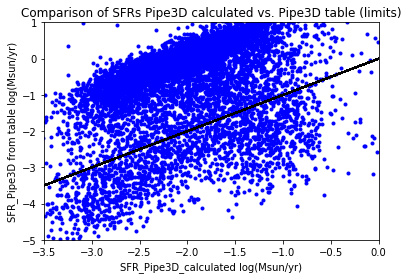

In [49]:
# Log graph Pipe3D calculated vs. Pipe3D table
# with limits

plt.xlabel("SFR_Pipe3D_calculated log(Msun/yr)")
plt.ylabel("SFR_Pipe3D from table log(Msun/yr)")
plt.title("Comparison of SFRs Pipe3D calculated vs. Pipe3D table (limits)")


plt.plot(SFR_Pipe3D_calculated_log, SFR_Pipe3D_table, "b.") 
plt.plot(SFR_Pipe3D_table, SFR_Pipe3D_table, "k-") 

plt.xlim(-3.5, 0)
plt.ylim(-5, 1)

plt.show()





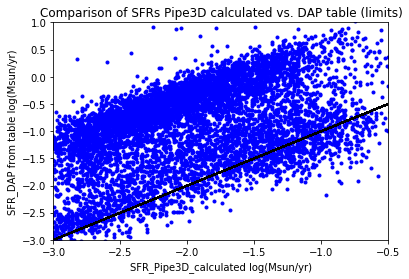

In [51]:
# Total graph Pipe3D calculated vs. DAP table
# with limits

plt.xlabel("SFR_Pipe3D_calculated log(Msun/yr)")
plt.ylabel("SFR_DAP from table log(Msun/yr)")
plt.title("Comparison of SFRs Pipe3D calculated vs. DAP table (limits)")


plt.plot(SFR_Pipe3D_calculated_log, SFR_DAP_table, "b.") 
plt.plot(SFR_DAP_table, SFR_DAP_table, "k-")

plt.xlim(-3, -0.5)
plt.ylim(-3, 1)

plt.show()


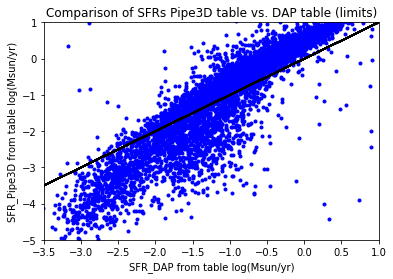

In [53]:
# Total graph Pipe3D table vs. DAP table
# with limits

plt.xlabel("SFR_DAP from table log(Msun/yr)")
plt.ylabel("SFR_Pipe3D from table log(Msun/yr)")
plt.title("Comparison of SFRs Pipe3D table vs. DAP table (limits)")


plt.plot(SFR_DAP_table, SFR_Pipe3D_table, "b.") 
plt.plot(SFR_DAP_table, SFR_DAP_table, "k-") 

plt.xlim(-3.5, 1)
plt.ylim(-5, 1)

plt.show()

/packages/python3.6.8/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: overflow encountered in multiply


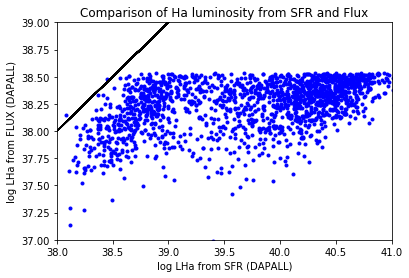

In [80]:
h = 0.71
Mpc = 3.086e+24 # in centimeters (CGS)

R_initial = numpy.array(DAP_Pipe3D_table['LDIST_Z'])  # Distance for Luminosity (h-1 Mpc)
R_cgs = R_initial * Mpc / h                             # in cm


All_Data = numpy.array(DAP_Pipe3D_table['EMLINE_GFLUX_TOT'].data[::])      #All Data for EMLINE_GFLUX_TOT
F_Ha_initial = numpy.array([x[18] for x in All_Data])    #19th element   UNITS: 10-17 erg/s/cm2     H alpha flux
F_Ha_cgs = F_Ha_initial * 1e-17                               # UNITS: erg/s/cm2



SFR_DAP_table_initial = numpy.array(DAP_Pipe3D_table['SFR_TOT'])          #    h-2 Msun/yr
non_zero_SFR = numpy.where(SFR_DAP_table_initial != 0)

SFR_DAP_table = SFR_DAP_table_initial[non_zero_SFR] * h ** -2                          #   Msun/yr


log_LHa_fromSFR = numpy.log10(SFR_DAP_table) + 41.47
# LHa_fromSFR = 10 ** log_LHa_fromSFR
LHa_fromFLUX_all = F_Ha_cgs * 4 * numpy.pi * R_cgs * R_cgs
log_LHa_fromFLUX = numpy.log10(LHa_fromFLUX_all[non_zero_SFR])


plt.xlabel("log LHa from SFR (DAPALL)")
plt.ylabel("log LHa from FLUX (DAPALL)")
plt.title("Comparison of Ha luminosity from SFR and Flux")


plt.plot(log_LHa_fromSFR, log_LHa_fromFLUX, "b.") 
plt.plot(log_LHa_fromSFR, log_LHa_fromSFR, "k-") 

plt.xlim(38, 41)
plt.ylim(37, 39)
plt.show()







